In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import plotly.figure_factory as ff
import plotly.express as px

In [14]:
file_path = r"C:\Users\tinuo\OneDrive\Desktop\white_wines.xlsx"
wine_df = pd.read_excel(file_path )
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [16]:
X= pd.get_dummies(wine_df)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01  2.82134917e+00
  -3.53550004e-02  5.69931577e-01  7.44565035e-01  2.33151201e+00
  -1.24692128e+00 -3.49184257e-01 -1.39315246e+00  1.37870140e-01]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 -9.44765273e-01
   1.47747079e-01 -1.25301866e+00 -1.49684624e-01 -9.15417164e-03
   7.40028640e-01  1.34184656e-03 -8.24275678e-01  1.37870140e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01  1.00282190e-01
   1.93522599e-01 -3.12141119e-01 -9.73335626e-01  3.58664800e-01
   4.75101984e-01 -4.36815783e-01 -3.36667007e-01  1.37870140e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01  1.37870140e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01  1.37870140e-01]]


In [18]:
#Perform dimensionality reduction with PCA
pca = PCA(n_components=3)

In [19]:
#Transform PCA datainto a dataframe
X_pca = pca.fit_transform(X_scaled)
pcs_df = pd.DataFrame(data=X_pca, columns=["PC 1", "PC 2", "PC 3"], index=wine_df.index)
pcs_df.head()

,PC 1,PC 2,PC 3
0,3.543318,-0.355087,-0.325833
1,-0.612800,0.289411,0.816434
2,0.142394,-1.168021,-0.153068
3,1.379525,0.199587,-0.324497
4,1.379525,0.199587,-0.324497


In [20]:
#EXplained variance
pca.explained_variance_ratio_

array([0.27888907, 0.13217419, 0.11426434])

In [21]:

#Best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
	km = KMeans(n_clusters=i, random_state=0)
	km.fit(pcs_df)
	inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [22]:
#Predicting K clusters
model = KMeans(n_clusters=5, random_state=5)
model
model.fit(pcs_df)
predictions = model.predict(pcs_df)
pcs_df["class"] = model.labels_
pcs_df.head()

,PC 1,PC 2,PC 3,class
0,3.543318,-0.355087,-0.325833,1
1,-0.612800,0.289411,0.816434,3
2,0.142394,-1.168021,-0.153068,0
3,1.379525,0.199587,-0.324497,1
4,1.379525,0.199587,-0.324497,1


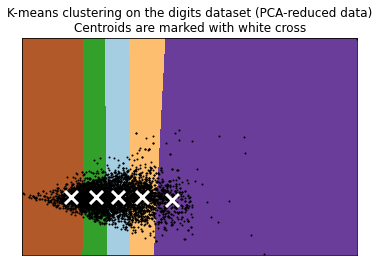

In [30]:
reduced_data = PCA(n_components=2).fit_transform(wine_df)
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4)
kmeans.fit(reduced_data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
